In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import os
from IPython.display import Audio
from IPython import display
import matplotlib.pyplot as plt
from librosa import display
import librosa
import pandas as pd
import csv
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn_extra.cluster import KMedoids

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest, f_classif 
from sklearn.mixture import GaussianMixture as GMM

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pip install scikit-learn-extra

     |████████████████████████████████| 1.7 MB 27.6 MB/s 


# Load Data

In [ ]:
!unrar x "/content/drive/MyDrive/ML_Data G1.rar"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/ML_Data G1.rar

Creating    ML_Data G1                                                OK
Creating    ML_Data G1/Bandari                                        OK
Extracting  ML_Data G1/Bandari/1.mp3                                       0%  OK 
Extracting  ML_Data G1/Bandari/10.mp3                                      0%  OK 
Extracting  ML_Data G1/Bandari/100.mp3                                     0%  OK 
Extracting  ML_Data G1/Bandari/101.mp3                                     0%  OK 
Extracting  ML_Data G1/Bandari/102.mp3                                     0%  OK 
Extracting  ML_Data G1/Bandari/103.mp3                                     0%  OK 
Extracting  ML_Data G1/Bandari/104.mp3                                     0%  OK 
Extracting  ML_Data G1/Bandari/105.mp3                                     0%

In [ ]:
pip install mutagen

     |████████████████████████████████| 218 kB 19.1 MB/s 


In [ ]:
from mutagen.mp3 import MP3

In [ ]:
base_folder_path = '/content/ML_Data G1'
base_folder = os.listdir(base_folder_path)

songs_names = []
genres = []


for folder_name in base_folder:
  songs = os.listdir(os.path.join(base_folder_path, folder_name))
  for song in songs:
    song_path = base_folder_path + '/' + folder_name + '/' + song
    try:
      MP3(song_path)
    except:
      print('File ',song_path,' is damaged!')
      continue
    songs_names.append(song_path)
    genres.append(folder_name)

songs_names = np.array(songs_names)
genres = np.array(genres)
print(songs_names[:3])
labels, count = np.unique(genres, return_counts=True)
print('genres: ',labels,'\nnumber of samples of each genre: ',count)

File  /content/ML_Data G1/Lori/89.mp3  is damaged!
File  /content/ML_Data G1/Lori/156.mp3  is damaged!
File  /content/ML_Data G1/Bandari/22.mp3  is damaged!
File  /content/ML_Data G1/Torki/231.mp3  is damaged!
File  /content/ML_Data G1/Torki/104.mp3  is damaged!
['/content/ML_Data G1/Lori/134.mp3' '/content/ML_Data G1/Lori/257.mp3'
 '/content/ML_Data G1/Lori/173.mp3']
genres:  ['Bandari' 'Gilaki' 'Kordi' 'Lori' 'Torki'] 
number of samples of each genre:  [275 267 280 269 287]


# Visualization

In [ ]:
visualizing_songs_paths = []
visualizing_songs_genres = []
for genre in labels:
  for idx in range(len(genres)):
    if(genres[idx] == genre):
      visualizing_songs_paths.append(songs_names[idx])
      visualizing_songs_genres.append(genre)
      break

visualizing_songs_paths

['/content/ML_Data G1/Bandari/92.mp3',
 '/content/ML_Data G1/Gilaki/92.mp3',
 '/content/ML_Data G1/Kordi/92.mp3',
 '/content/ML_Data G1/Lori/92.mp3',
 '/content/ML_Data G1/Torki/92.mp3']

SONG GENRE:  Bandari
   song time series [0. 0. 0. ... 0. 0. 0.]


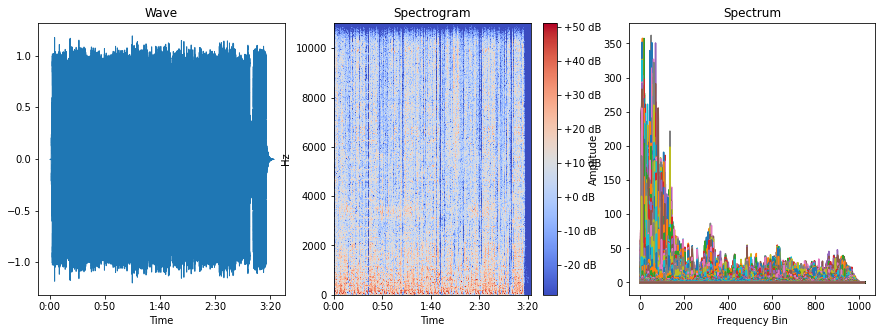

SONG GENRE:  Gilaki
   song time series [0. 0. 0. ... 0. 0. 0.]


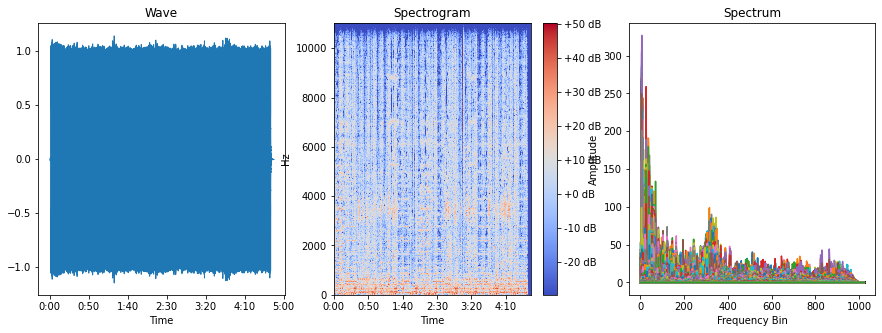

SONG GENRE:  Kordi
   song time series [0. 0. 0. ... 0. 0. 0.]


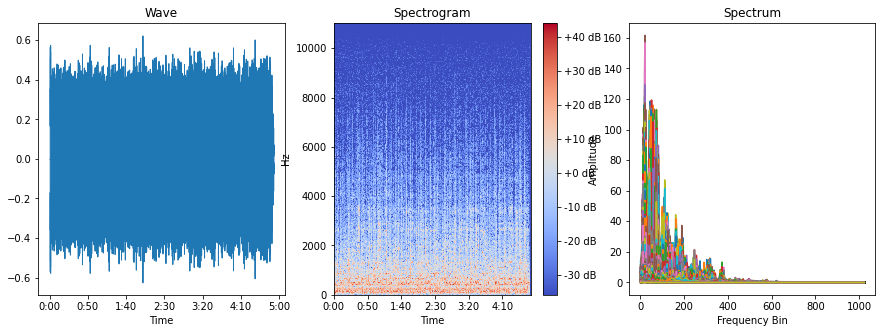

SONG GENRE:  Lori
   song time series [ 1.2800663e-07 -1.7930159e-07  2.3660080e-07 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]


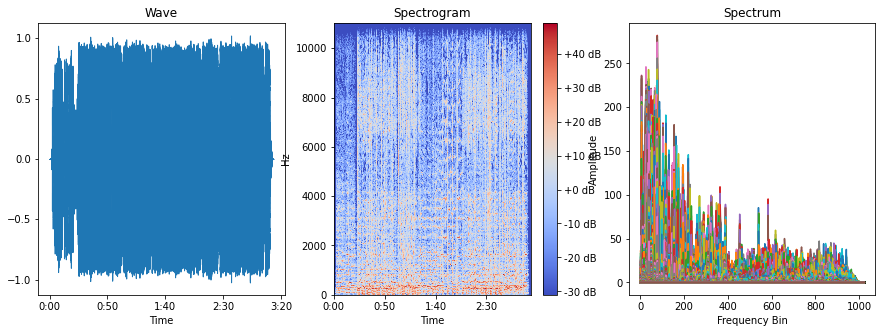

SONG GENRE:  Torki
   song time series [-4.7441931e-06 -4.8245433e-06  1.4036724e-06 ...  1.6018352e-05
 -4.0082214e-05 -1.9453513e-05]


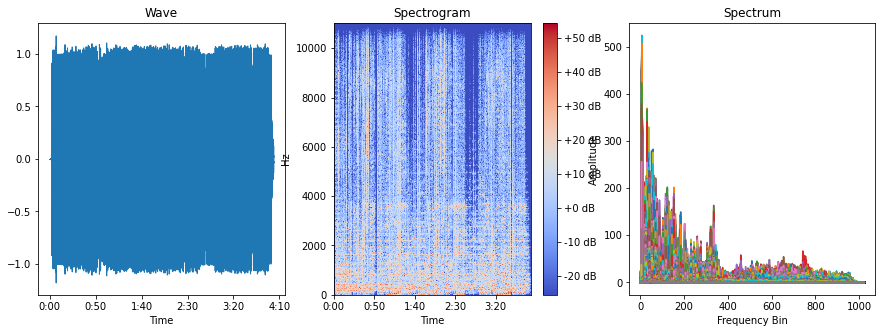

In [ ]:
for i in range(len(visualizing_songs_paths)):
  plt.figure(figsize=(15,5))

  plt.subplot(1,3,1)
  song_path = visualizing_songs_paths[i]
  print('SONG GENRE: ', visualizing_songs_genres[i])
  y,sr = librosa.load(song_path)
  print('   song time series',y)
  display.waveshow(y, sr=sr)
  plt.title('Wave')

  plt.subplot(1,3,2)
  spectrogram_data = librosa.stft(y)
  decibels = librosa.amplitude_to_db(abs(spectrogram_data))
  librosa.display.specshow(decibels, y_axis='hz', x_axis='time')
  plt.title('Spectrogram')
  plt.colorbar(format='%+2.0f dB')

  plt.subplot(1,3,3)
  ft = np.abs(spectrogram_data)
  plt.plot(ft)
  plt.title('Spectrum')
  plt.xlabel('Frequency Bin')
  plt.ylabel('Amplitude')

  plt.show()

# Feature Extraction

In [ ]:
y,sr = librosa.load(songs_names[0])

## Features

### Zero Crossing

In [ ]:
zero_crossings = librosa.zero_crossings(y, pad=False)
print(sum(zero_crossings))

298176


### Spectral Centroid

(12599,)


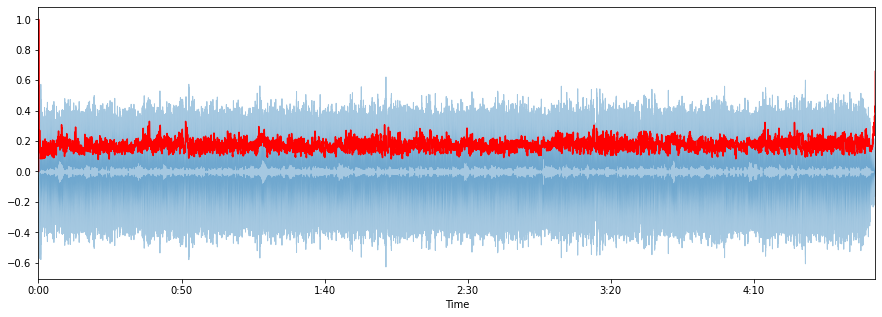

In [ ]:
import sklearn

spectral_centroids = librosa.feature.spectral_centroid(y, sr=sr)[0]
print(spectral_centroids.shape)

frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
normalized = sklearn.preprocessing.minmax_scale(spectral_centroids, axis=0)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(y, sr=sr, alpha=0.4)
plt.plot(t, normalized, color='r')
plt.show()

### Spectral Rolloff

(12599,)


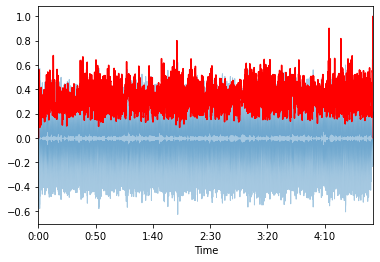

In [ ]:
spectral_rolloff = librosa.feature.spectral_rolloff(y+0.01, sr=sr)[0]
print(spectral_rolloff.shape)
librosa.display.waveplot(y, sr=sr, alpha=0.4)
normalized = sklearn.preprocessing.minmax_scale(spectral_rolloff, axis=0)
plt.plot(t, normalized, color='r')
plt.show()

### Mel-Frequency Cepstral Coefficients

(20, 12599)


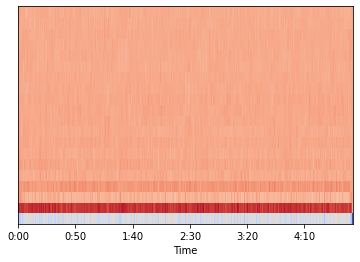

In [ ]:
mfccs = librosa.feature.mfcc(y, sr=sr)
print(mfccs.shape)
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.show()

### Chroma Frequencies

(12, 12599)


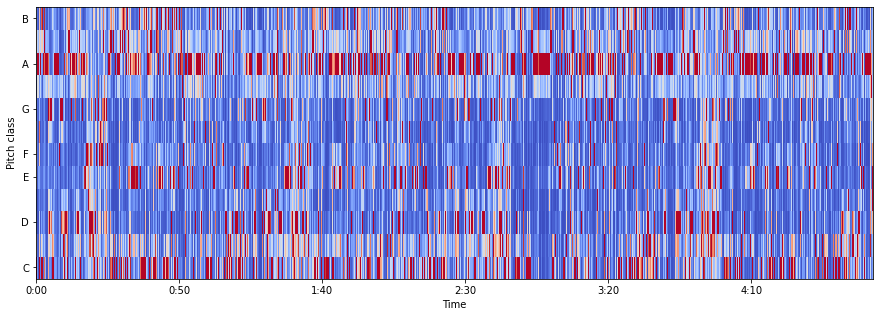

In [ ]:
chroma_freq = librosa.feature.chroma_stft(y, sr=sr)
print(chroma_freq.shape)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chroma_freq, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.show()

## Extraction

In [ ]:
class featureExtraction():
  def __init__(self, y, sr):
    self.y = y
    self.sr = sr
  
  def add_zero_crossing(self,i):
    self.zero_crossing = sum(librosa.zero_crossings(self.y[i], pad=False))

  def add_sprectral_centroids(self,i):
    self.spectral_centroid = librosa.feature.spectral_centroid(self.y[i], sr=self.sr)[0]

  def add_sprectral_rolloff(self,i):
    self.spectral_rolloff = librosa.feature.spectral_rolloff(self.y[i]+0.01, sr=self.sr)[0]

  def add_mfccs(self,i):
    self.mfccs = librosa.feature.mfcc(self.y[i], sr=self.sr)

  def add_chroma_frequencies(self,i):  
    self.chroma_freq = librosa.feature.chroma_stft(self.y[i], sr=self.sr)

  def write(self,genre,file_name):
    row = [self.zero_crossing,self.spectral_centroid.mean(axis=0),self.spectral_centroid.var(axis=0),
           self.spectral_rolloff.mean(axis=0),self.spectral_rolloff.var(axis=0)]

    mfcc_means = self.mfccs.mean(axis=1)
    mfcc_vars = self.mfccs.var(axis=1)
    for i in range(self.mfccs.shape[0]):
      row.append(mfcc_means[i])
      row.append(mfcc_vars[i])

    chroma_means = self.chroma_freq.mean(axis=1)
    chroma_vars = self.chroma_freq.var(axis=1)

    for i in range(self.chroma_freq.shape[0]):
      row.append(chroma_means[i])
      row.append(chroma_vars[i])

    row.append(genre)
    file = open(file_name, 'a', newline='')
    with file:
      writer = csv.writer(file)
      writer.writerow(row)

  def extract(self,genre,file_name):
    for p_y in range(len(self.y)):
      self.add_zero_crossing(p_y)
      self.add_sprectral_centroids(p_y)
      self.add_sprectral_rolloff(p_y)
      self.add_mfccs(p_y)
      self.add_chroma_frequencies(p_y)
      self.write(genre,file_name)


# Create DataFrame

In [ ]:
def create_file(file_name):
  header = ['zero_crossing', 'spectral_centroid_mean', 'spectral_centroid_var', 'sprectral_rolloff_mean', 'sprectral_rolloff_var']
  for i in range(20):
    header.append(f'mfcc_mean{i}')
    header.append(f'mfcc_var{i}')
  for i in range(12):
    header.append(f'chroma_mean{i}')
    header.append(f'chroma_var{i}')
  header.append('genre')
  file = open(file_name, 'w', newline='')
  with file:
    writer = csv.writer(file)
    writer.writerow(header)

In [ ]:
def create_dataFrame(songs_names,genres,file_name):
  one_min = 1300000
  data_list = []
  create_file(file_name)
  for i in range(len(songs_names)):
    y,sr = librosa.load(songs_names[i])
    partitions = np.array_split(y, (y.shape[0]) // one_min + 1)
    fe = featureExtraction(partitions,sr)
    fe.extract(genres[i],file_name)

In [ ]:
create_dataFrame(songs_names[:269],genres[:269],'Lori.csv')

In [ ]:
create_dataFrame(songs_names[269:549],genres[269:549],'Kordi.csv')

In [ ]:
create_dataFrame(songs_names[549:824],genres[549:824],'Bandari.csv')

In [ ]:
create_dataFrame(songs_names[824:1091],genres[824:1091],'Gilaki.csv')

In [ ]:
create_dataFrame(songs_names[1091:],genres[1091:],'Torki.csv')

# Load from dataset

In [ ]:
bandari = pd.read_csv('/content/drive/MyDrive/Bandari.csv')
kordi = pd.read_csv('/content/drive/MyDrive/Kordi.csv')
lori = pd.read_csv('/content/drive/MyDrive/Lori.csv')
torki = pd.read_csv('/content/drive/MyDrive/Torki.csv')
gilaki = pd.read_csv('/content/drive/MyDrive/Gilaki.csv')

In [ ]:
data = bandari.append([kordi,lori,torki,gilaki],ignore_index=True)
data

,zero_crossing,spectral_centroid_mean,spectral_centroid_var,sprectral_rolloff_mean,sprectral_rolloff_var,mfcc_mean0,mfcc_var0,mfcc_mean1,mfcc_var1,mfcc_mean2,mfcc_var2,mfcc_mean3,mfcc_var3,mfcc_mean4,mfcc_var4,mfcc_mean5,mfcc_var5,mfcc_mean6,mfcc_var6,mfcc_mean7,mfcc_var7,mfcc_mean8,mfcc_var8,mfcc_mean9,mfcc_var9,mfcc_mean10,mfcc_var10,mfcc_mean11,mfcc_var11,mfcc_mean12,mfcc_var12,mfcc_mean13,mfcc_var13,mfcc_mean14,mfcc_var14,mfcc_mean15,mfcc_var15,mfcc_mean16,mfcc_var16,mfcc_mean17,mfcc_var17,mfcc_mean18,mfcc_var18,mfcc_mean19,mfcc_var19,chroma_mean0,chroma_var0,chroma_mean1,chroma_var1,chroma_mean2,chroma_var2,chroma_mean3,chroma_var3,chroma_mean4,chroma_var4,chroma_mean5,chroma_var5,chroma_mean6,chroma_var6,chroma_mean7,chroma_var7,chroma_mean8,chroma_var8,chroma_mean9,chroma_var9,chroma_mean10,chroma_var10,chroma_mean11,chroma_var11,genre
0,155267,1926.733226,2.423799e+06,2965.155312,6.613296e+06,-229.510160,15094.64800,122.260260,4034.09640,5.658326,1131.06300,15.572118,539.16156,0.353207,347.43106,8.432192,153.389680,-2.600431,141.82323,-4.453163,156.13730,-1.288256,100.669790,-5.963717,74.211140,-2.147307,61.151836,4.088426,62.928288,2.540181,90.578540,-3.760949,75.026880,0.713988,106.055984,1.457110,73.720430,-5.854289,72.464806,-1.096654,67.796520,-6.756278,46.443275,-4.471179,68.163440,0.745869,0.745869,0.382312,0.382312,0.234744,0.234744,0.337299,0.337299,0.171468,0.171468,0.114788,0.114788,0.175864,0.175864,0.519278,0.519278,0.289738,0.289738,0.172822,0.172822,0.294995,0.294995,0.336917,0.336917,Bandari
1,113724,2324.607839,4.325743e+05,5501.340962,2.399645e+06,-108.521255,2258.48440,99.554040,460.57710,18.228016,509.16165,5.775361,307.62103,-3.049146,246.70540,12.927679,148.861720,-4.930715,160.07094,-0.281948,209.53840,-3.284494,109.948845,5.618709,100.862750,-6.240521,88.619064,7.309806,74.001560,-1.261567,90.714600,-2.339185,101.150940,-0.219548,84.855880,0.054650,111.126724,-8.291932,117.157000,-1.552030,71.337780,-2.974686,75.242775,-7.907569,72.389550,0.676141,0.676141,0.369920,0.369920,0.319459,0.319459,0.329841,0.329841,0.301913,0.301913,0.301557,0.301557,0.344911,0.344911,0.462637,0.462637,0.290112,0.290112,0.335061,0.335061,0.455387,0.455387,0.425946,0.425946,Bandari
2,106748,2037.623535,1.806970e+05,4563.104583,1.416144e+06,-69.051070,992.82056,108.444885,315.62527,-0.735859,321.67825,15.955583,165.50575,-1.440406,141.62068,11.323314,114.016040,-10.863197,113.89494,4.960437,96.88423,-7.900577,67.757070,5.475716,74.479760,-4.918956,59.966473,4.971403,68.195950,0.459416,75.605140,-0.396313,65.449210,0.061912,61.294510,-3.730398,62.344616,-3.390828,65.183716,-0.960138,51.172707,-1.572933,65.891174,-3.160547,77.806090,0.730500,0.730500,0.422307,0.422307,0.353532,0.353532,0.430096,0.430096,0.347004,0.347004,0.323914,0.323914,0.331901,0.331901,0.444314,0.444314,0.237030,0.237030,0.273944,0.273944,0.467093,0.467093,0.435054,0.435054,Bandari
3,110494,2102.175118,2.316558e+05,4599.347217,1.411712e+06,-85.574295,1925.95560,103.687195,416.58580,0.359048,391.52936,17.753962,197.59634,-1.834828,185.16716,12.063649,145.135700,-2.975506,183.24854,1.510466,156.05165,-3.972855,82.844284,7.368104,97.881065,-3.409970,83.029690,3.564182,67.166020,-0.946102,79.840256,-2.069597,96.029625,0.231842,67.297455,0.596746,62.732876,-3.941806,78.358360,-0.528728,91.991890,-0.916938,70.168950,-2.285243,61.986590,0.652545,0.652545,0.412565,0.412565,0.400755,0.400755,0.367574,0.367574,0.333387,0.333387,0.330640,0.330640,0.396419,0.396419,0.522090,0.522090,0.310813,0.310813,0.314925,0.314925,0.385205,0.385205,0.412931,0.412931,Bandari
4,89701,1848.973289,2.574610e+05,4067.466943,1.867315e+06,-90.710160,1432.97690,116.777370,416.22446,0.263450,337.08615,16.848635,275.58282,-4.036612,143.60327,8.357489,95.793884,-5.107583,97.79403,4.564525,117.23721,-6.249874,70.770230,2.468715,85.801445,-3.333860,57.543740,0.601441,58.431830,-2.398518,57.853424,-0.397406,70.758320,-2.194192,48.645466,1.844623,44.983284,-3.111451,75.615295,-0.647481,46.86

In [ ]:
data = data.sample(frac = 1)
data.reset_index(drop = True, inplace = True)
data

,zero_crossing,spectral_centroid_mean,spectral_centroid_var,sprectral_rolloff_mean,sprectral_rolloff_var,mfcc_mean0,mfcc_var0,mfcc_mean1,mfcc_var1,mfcc_mean2,mfcc_var2,mfcc_mean3,mfcc_var3,mfcc_mean4,mfcc_var4,mfcc_mean5,mfcc_var5,mfcc_mean6,mfcc_var6,mfcc_mean7,mfcc_var7,mfcc_mean8,mfcc_var8,mfcc_mean9,mfcc_var9,mfcc_mean10,mfcc_var10,mfcc_mean11,mfcc_var11,mfcc_mean12,mfcc_var12,mfcc_mean13,mfcc_var13,mfcc_mean14,mfcc_var14,mfcc_mean15,mfcc_var15,mfcc_mean16,mfcc_var16,mfcc_mean17,mfcc_var17,mfcc_mean18,mfcc_var18,mfcc_mean19,mfcc_var19,chroma_mean0,chroma_var0,chroma_mean1,chroma_var1,chroma_mean2,chroma_var2,chroma_mean3,chroma_var3,chroma_mean4,chroma_var4,chroma_mean5,chroma_var5,chroma_mean6,chroma_var6,chroma_mean7,chroma_var7,chroma_mean8,chroma_var8,chroma_mean9,chroma_var9,chroma_mean10,chroma_var10,chroma_mean11,chroma_var11,genre
0,119756,2408.630962,1.255075e+06,4869.632217,4.983005e+06,-79.426630,11149.5160,83.798020,1791.90200,5.921742,465.18204,28.251274,274.27893,11.215223,192.16150,7.736183,152.238450,4.679697,115.245900,10.899570,92.473785,-4.055422,119.921360,5.775345,84.763220,1.603666,87.70703,6.621536,89.54126,1.934840,89.269690,5.797968,65.550100,-0.080548,69.118010,7.413646,72.248890,-0.619995,61.058155,2.214563,77.171550,-0.188019,62.726227,6.127380,78.401290,0.396090,0.396090,0.450802,0.450802,0.386958,0.386958,0.354759,0.354759,0.456150,0.456150,0.387940,0.387940,0.500490,0.500490,0.427848,0.427848,0.442053,0.442053,0.495780,0.495780,0.441895,0.441895,0.492285,0.492285,Lori
1,144895,2941.798401,7.582423e+05,6435.664984,2.601420e+06,-47.019787,9590.8530,64.415730,869.22186,21.652000,422.05090,21.758877,329.03683,11.490287,171.36280,18.097523,85.598730,4.805208,86.343254,5.343979,76.113106,-8.606648,75.542520,13.873647,97.721140,1.035560,58.18889,5.399614,56.03182,-3.706776,51.266754,-1.872503,46.124140,-4.712814,44.103767,-3.762997,40.734238,-9.905201,48.354076,2.420260,52.027042,-5.287019,61.663200,3.447767,98.912850,0.319516,0.319516,0.359236,0.359236,0.510484,0.510484,0.475396,0.475396,0.443857,0.443857,0.451015,0.451015,0.347803,0.347803,0.268282,0.268282,0.310641,0.310641,0.409470,0.409470,0.360693,0.360693,0.312055,0.312055,Torki
2,131413,2503.381935,4.113328e+05,5340.181409,1.563828e+06,-110.719100,2737.4110,80.005486,471.84326,-10.578047,288.85934,8.290862,240.79648,-5.997498,202.15860,1.909284,115.275350,-11.517038,167.780380,4.741282,193.755580,-27.207506,205.324460,-5.550502,110.590730,-1.848499,133.68472,-6.386481,129.59780,-5.476933,107.238420,-6.780849,89.746920,-13.363458,87.291610,-4.160714,109.164930,-13.999402,79.507240,-7.817865,93.585100,-6.134473,83.644684,-11.355464,153.620470,0.271266,0.271266,0.426263,0.426263,0.239820,0.239820,0.252645,0.252645,0.300472,0.300472,0.229568,0.229568,0.352674,0.352674,0.178740,0.178740,0.185596,0.185596,0.181897,0.181897,0.174315,0.174315,0.352179,0.352179,Gilaki
3,95356,1983.663339,4.913251e+05,4377.785783,2.229256e+06,-91.110830,1737.1483,118.711945,645.21216,-10.861762,496.95715,50.470695,255.67816,-14.481504,221.72815,26.363356,161.000600,-22.533620,114.189960,22.841595,122.597755,-26.537851,90.103480,13.639762,85.674160,-14.559488,75.22814,4.387861,76.27654,-9.311761,76.244156,-1.022448,60.963170,-10.823893,46.240326,-0.695256,52.359215,-10.294657,48.700977,-7.499136,43.530320,-3.169391,45.996280,-4.332246,45.550446,0.634975,0.634975,0.507577,0.507577,0.312518,0.312518,0.309998,0.309998,0.320585,0.320585,0.309878,0.309878,0.296312,0.296312,0.218996,0.218996,0.208886,0.208886,0.225951,0.225951,0.209203,0.209203,0.352715,0.352715,Gilaki
4,116559,2437.615961,6.172952e+05,5252.653423,2.953011e+06,-6.735056,2837.1582,84.881584,652.52734,1.230281,541.53590,22.931736,309.09827,11.456010,159.23332,8.609384,141.933700,4.466162,169.154720,10.282313,121.593880,-7.463770,97.107920,5.008883,81.401566,-4.047803,114.20881,1.600133,77.51916,-0.034196,60.678432,2.046000,53.277000,1.321435,91.043200,0.778308,100.795610,-4.324134,77.288150,1.070373,73.799774,

In [ ]:
data.to_csv('/content/drive/MyDrive/ml_data.csv')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ml_data.csv')

# Preprocess

## Standardization and Label Encoding

In [ ]:
def standardization(X):
  scaler = StandardScaler()
  std_X = scaler.fit_transform(X)
  return std_X

def normalization(X):
  scaler = MinMaxScaler()
  norm_X = scaler.fit_transform(X)
  return norm_X

def label_encoding(y):
  encoder = LabelEncoder()
  labeled_y = encoder.fit_transform(y)
  return labeled_y

In [ ]:
X, y = data.drop(columns = ['genre']), data['genre']

In [ ]:
std_X = pd.DataFrame(standardization(X))
std_X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69
0,-1.731813,1.102853,0.744020,-0.844811,0.616661,-0.676932,1.014279,-0.778857,-0.576378,-0.896134,-0.294864,-0.351870,0.550038,-0.680244,0.239010,-0.721233,0.186385,-0.925624,-0.186922,-0.447466,0.455077,-0.578466,-0.256449,-0.649610,-0.018059,-0.794883,0.853119,-0.814949,0.026330,-0.890278,-0.800553,-0.460300,1.133321,-0.727038,-0.189983,-0.992192,-0.219938,-0.432355,-0.759529,-0.941038,0.684325,-0.553401,-0.864624,-0.795033,-0.100799,-0.548981,-0.048606,-0.048606,0.838110,0.838110,0.182674,0.182674,-0.309423,-0.309423,0.882705,0.882705,0.791651,0.791651,1.778366,1.778366,0.774975,0.774975,1.371691,1.371691,0.905670,0.905670,-0.201584,-0.201584,0.692824,0.692824
1,-1.731336,-0.485259,0.092333,0.079200,0.236312,0.285713,0.725678,0.158515,-0.384009,-0.362563,0.422164,-0.080991,1.183359,0.471111,0.861361,-0.135839,0.649112,0.094361,0.918597,-0.065801,0.351169,-0.362720,0.080220,-0.631036,-0.261144,-0.161255,-0.309459,-0.172340,0.136772,-0.287556,-0.557942,-0.221281,-0.487437,-0.381537,-0.667634,-0.423280,-1.256030,-0.466596,-1.054065,-0.190787,-0.518979,-0.483804,-0.956669,-0.214248,-0.035540,0.163331,-0.257351,-0.257351,0.486359,0.486359,0.320790,0.320790,1.962044,1.962044,0.009055,0.009055,0.203563,0.203563,-0.184451,-0.184451,-0.444419,-0.444419,0.078200,0.078200,-0.064000,-0.064000,0.830030,0.830030,-0.234157,-0.234157
2,-1.730860,-0.382938,0.765954,0.068459,1.403387,0.498307,-0.270945,-0.490537,-0.562938,-0.456495,0.962119,-0.964421,-0.477846,-0.634026,0.255897,-1.011080,-0.746851,-0.033003,0.516215,-0.461388,-1.821766,0.058863,0.444113,-0.788641,-1.034639,-0.978955,-0.807291,-0.600412,0.643736,-0.731017,-1.116868,-0.273394,-0.950520,-0.094661,-2.182397,-0.665560,-1.821575,-0.781130,-1.982707,-0.723508,-0.987638,-0.782559,-0.724801,-0.427411,1.773643,1.705772,1.159926,1.159926,-0.609915,-0.609915,-1.413947,-1.413947,-1.450580,-1.450580,0.042819,0.042819,1.591398,1.591398,-0.706232,-0.706232,-1.343147,-1.343147,-2.173139,-2.173139,-2.337495,-2.337495,-2.249952,-2.249952,-0.320491,-0.320491
3,-1.730384,-0.256018,-0.207249,-0.866252,-0.140158,-0.622428,0.732885,-0.656649,0.239058,-0.872063,-0.234370,-0.579107,-0.707773,-0.314013,-0.822628,-0.629485,0.053238,0.182326,0.110659,-0.471261,0.511763,-0.628190,0.143100,-0.227037,0.310901,-0.656354,0.436026,-0.299736,-0.186658,-0.205419,0.072739,-0.815822,0.249871,-0.621928,-1.181469,-0.742141,0.066856,-0.644209,-0.440549,-0.427512,-0.518213,-0.560251,-0.676513,0.162105,0.048584,-0.145479,0.605097,0.605097,-0.624979,-0.624979,0.346472,0.346472,0.168454,0.168454,1.165925,1.165925,0.179371,0.179371,-0.373018,-0.373018,0.028632,0.028632,-0.630129,-0.630129,0.546581,0.546581,-0.460556,-0.460556,-0.274029,-0.274029
4,-1.729907,0.857716,0.887318,0.231831,1.024829,-0.141851,0.810855,-0.443123,-0.626268,0.178410,0.317155,-0.118444,-0.894825,-0.368279,-0.107468,0.049164,-0.197536,0.070804,-1.440405,-0.656287,-0.145182,0.458232,-0.285582,0.190258,-0.014020,0.261030,-0.434932,0.601776,0.623340,0.275100,0.228580,-0.228187,0.310359,0.004403,0.312880,0.391885,0.612303,0.196984,-0.355208,0.397432,-0.044053,-0.053212,0.214834,-0.391155,0.118498,-0.688180,0.814531,0.814531,1.876849,1.876849,0.177673,0.177673,-0.048590,-0.048590,-1.370281,-1.370281,0.043713,0.043713,-0.122568,-0.122568,-0.734122,-0.734122,-0.050792,-0.050792,-1.027277,-1.027277,0.167287,0.167287,0.411273,0.411273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7268,1.729907,-1.182742,-0.422630,0.300978,-0.063001,0.361609,0.121634,-0.541898,0.160980,0.022056,1.062315,-0.338249,0.871547,-0.519325,0.759379,-0.

In [ ]:
norm_X = normalization(X)
norm_X

array([[0.00000000e+00, 2.63425794e-01, 4.62079367e-01, ...,
        4.96976253e-01, 6.34861904e-01, 6.34861904e-01],
       [1.37513751e-04, 3.18723741e-01, 5.71448426e-01, ...,
        3.97144468e-01, 3.84161792e-01, 3.84161792e-01],
       [2.75027503e-04, 2.89067552e-01, 4.81515709e-01, ...,
        1.68008421e-01, 4.39973828e-01, 4.39973828e-01],
       ...,
       [9.99724972e-01, 2.65728867e-01, 4.51494946e-01, ...,
        1.69457438e-01, 3.27141226e-01, 3.27141226e-01],
       [9.99862486e-01, 3.88603418e-01, 6.45219239e-01, ...,
        6.01575193e-01, 6.48198379e-01, 6.48198379e-01],
       [1.00000000e+00, 3.84727569e-01, 5.30339016e-01, ...,
        3.71481638e-01, 5.26231837e-01, 5.26231837e-01]])

In [ ]:
y = label_encoding(y)
y

array([3, 4, 1, ..., 3, 0, 0])

# Models

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(std_X, y, test_size=0.3)
y_train

array([2, 1, 2, ..., 0, 3, 1])

## Classification

### KNN

In [ ]:
kbest = SelectKBest(f_classif)
knn = KNeighborsClassifier()

pipe = Pipeline([('kbest',kbest), ('knn',knn)])
grid_params = {'knn__n_neighbors' : np.arange(1,10), 'kbest__k':[30,40,50,60]}
gs = GridSearchCV(pipe, grid_params, cv=5)
res = gs.fit(X_train,y_train)
print(res.best_params_)

{'kbest__k': 60, 'knn__n_neighbors': 1}


In [ ]:
print(gs.score(X_train,y_train))
print(gs.score(X_test,y_test))
y_pred = gs.predict(X_test)

1.0
0.8790100824931256


              precision    recall  f1-score   support

           0       0.86      0.91      0.88       438
           1       0.89      0.89      0.89       412
           2       0.88      0.86      0.87       476
           3       0.91      0.87      0.89       476
           4       0.85      0.86      0.85       380

    accuracy                           0.88      2182
   macro avg       0.88      0.88      0.88      2182
weighted avg       0.88      0.88      0.88      2182



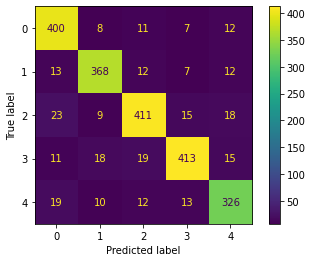

In [ ]:
print(classification_report(y_test,y_pred))
plot_confusion_matrix(gs, X_test, y_test)
plt.show()

In [ ]:
kbestknn = SelectKBest(f_classif,k = 60)
Xbest_train = kbestknn.fit_transform(X_train,y_train)
Xbest_test = kbestknn.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xbest_train,y_train)
y_pred = knn.predict(Xbest_test)
print(knn.score(Xbest_train,y_train))
print(knn.score(Xbest_test,y_test))

0.9292869770182676
0.8148487626031164


              precision    recall  f1-score   support

           0       0.73      0.90      0.81       438
           1       0.81      0.85      0.83       412
           2       0.84      0.79      0.82       476
           3       0.91      0.79      0.84       476
           4       0.80      0.74      0.77       380

    accuracy                           0.81      2182
   macro avg       0.82      0.81      0.81      2182
weighted avg       0.82      0.81      0.82      2182



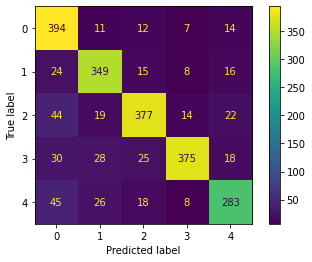

In [ ]:
print(classification_report(y_test,y_pred))
plot_confusion_matrix(knn, Xbest_test, y_test)
plt.show()

### SVM

In [ ]:
svm = SVC()
pipe = Pipeline([('kbest',kbest), ('svm',svm)])
grid_params = {'svm__kernel' : ['rbf','poly'], 'svm__C': [0.1, 1, 10],'kbest__k':[30,40,50,60]}
gs = GridSearchCV(pipe, grid_params, cv=2)
res = gs.fit(X_train,y_train)
print(res.best_params_)

{'kbest__k': 60, 'svm__C': 10, 'svm__kernel': 'rbf'}


In [ ]:
print(gs.score(X_train,y_train))
print(gs.score(X_test,y_test))
y_pred = gs.predict(X_test)

0.9846788450206246
0.8327222731439047


              precision    recall  f1-score   support

           0       0.83      0.86      0.84       438
           1       0.86      0.84      0.85       412
           2       0.84      0.83      0.84       476
           3       0.85      0.83      0.84       476
           4       0.78      0.81      0.79       380

    accuracy                           0.83      2182
   macro avg       0.83      0.83      0.83      2182
weighted avg       0.83      0.83      0.83      2182



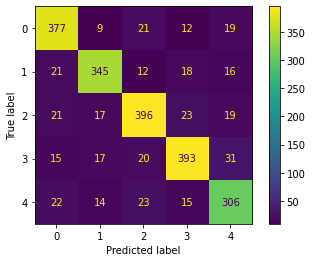

In [ ]:
print(classification_report(y_test,y_pred))
plot_confusion_matrix(gs, X_test, y_test)
plt.show()

### Logistic Regression

In [ ]:
poly = PolynomialFeatures(degree = 3, interaction_only=False, include_bias=False)
lr = LogisticRegression()
pipe = Pipeline([('kbest',kbest), ('polynomial_features',poly),('logistic_regression',lr)])

grid_params = {'logistic_regression__C':[0.1, 1, 10],'kbest__k':[30,40,50,60]}
gs = GridSearchCV(pipe, grid_params, cv=2)
res = gs.fit(X_train,y_train)
print(res.best_params_)

{'kbest__k': 60, 'logistic_regression__C': 1}


In [ ]:
print(gs.score(X_train,y_train))
print(gs.score(X_test,y_test))
y_pred = gs.predict(X_test)

1.0
0.8244729605866178


              precision    recall  f1-score   support

           0       0.84      0.87      0.85       438
           1       0.87      0.82      0.85       412
           2       0.83      0.81      0.82       476
           3       0.82      0.80      0.81       476
           4       0.76      0.82      0.79       380

    accuracy                           0.82      2182
   macro avg       0.82      0.82      0.82      2182
weighted avg       0.83      0.82      0.82      2182



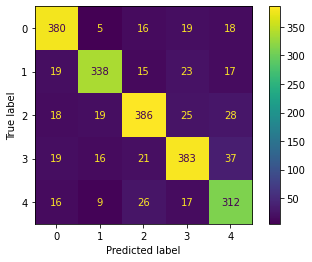

In [ ]:
print(classification_report(y_test,y_pred))
plot_confusion_matrix(gs, X_test, y_test)
plt.show()

In [53]:
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=False)
lr = LogisticRegression()
pipe = Pipeline([('kbest',kbest), ('polynomial_features',poly),('logistic_regression',lr)])

grid_params = {'logistic_regression__C':[0.1, 1, 10],'kbest__k':[30,40,50,60]}
gs = GridSearchCV(pipe, grid_params, cv=2)
res = gs.fit(X_train,y_train)
print(res.best_params_)

{'kbest__k': 60, 'logistic_regression__C': 0.1}


In [54]:
print(gs.score(X_train,y_train))
print(gs.score(X_test,y_test))
y_pred = gs.predict(X_test)

0.963661363189943
0.7149404216315307


              precision    recall  f1-score   support

           0       0.75      0.75      0.75       438
           1       0.72      0.70      0.71       412
           2       0.70      0.72      0.71       476
           3       0.73      0.71      0.72       476
           4       0.66      0.69      0.68       380

    accuracy                           0.71      2182
   macro avg       0.71      0.71      0.71      2182
weighted avg       0.72      0.71      0.72      2182



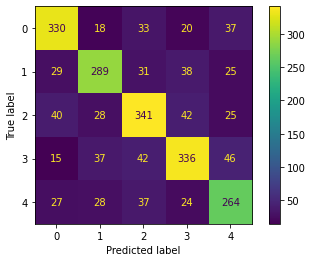

In [55]:
print(classification_report(y_test,y_pred))
plot_confusion_matrix(gs, X_test, y_test)
plt.show()

## Clustering

In [ ]:
def plot_clusters(data, predicted_labels, n_clusters):
    colors = ["red", "blue", "green", "purple", "orange", "yellow"]
    plt.figure(figsize=(6, 6))
    plt.xlabel("comp1")
    plt.ylabel("comp2")
    plt.title("Scatter For {} Clusters".format(n_clusters))
    for i in range(n_clusters):
        plt.scatter(reduced_data.iloc[predicted_labels == i, 0], 
                    reduced_data.iloc[predicted_labels == i, 1], 
                    s=25, marker='o', color=colors[i])
    plt.show()


def calc_purity(predicted, actual):
    performance_df = pd.DataFrame()
    performance_df["actual"] = actual
    performance_df.reset_index(inplace=True)
    performance_df["predicted"] = predicted
    kmeans_labels_groups_sum = (
        performance_df
        .groupby(["predicted", "actual"])["index"]
        .count()
        .reset_index(name='count')
        .groupby(["predicted"])
        .agg(max_label_count=('count',np.max), cluster_size=('count', np.sum))
    )
    purity = round(100 * kmeans_labels_groups_sum["max_label_count"].sum() / kmeans_labels_groups_sum["cluster_size"].sum(), 3)
    # print('\033[1m' + 'Purity = ' + str(purity) + '%\033[0m')
    df = performance_df.groupby(["predicted", "actual"])["index"].count()
    print(df)
    print("------------------------------------------")
    return purity


### Clustering Data Preparation / PCA

In [ ]:
pca = PCA(n_components = 2)

encoded_y = label_encoding(y)
encoded_y = pd.Series(encoded_y) 

principal_components = pca.fit_transform(std_X, y)

reduced_df = pd.DataFrame(data = principal_components, columns = ['comp1', 'comp2'])
reduced_df


,comp1,comp2
0,4.191857,-1.889147
1,1.353658,-1.076610
2,-3.006180,-3.981811
3,0.678958,-2.279955
4,0.452338,-0.058732
...,...,...
7268,2.026839,0.280832
7269,3.648522,0.448406
7270,-0.607310,-2.254953
7271,1.050640,3.857931


In [ ]:
full_data = std_X
reduced_data = reduced_df

reduced_data

,comp1,comp2
0,4.191857,-1.889147
1,1.353658,-1.076610
2,-3.006180,-3.981811
3,0.678958,-2.279955
4,0.452338,-0.058732
...,...,...
7268,2.026839,0.280832
7269,3.648522,0.448406
7270,-0.607310,-2.254953
7271,1.050640,3.857931


### K-Means

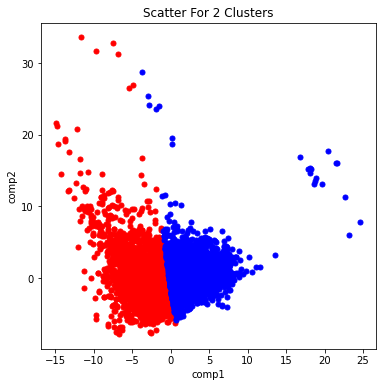

predicted  actual 
0          Bandari     280
           Gilaki      898
           Kordi       643
           Lori       1080
           Torki       459
1          Bandari    1201
           Gilaki      481
           Kordi       893
           Lori        459
           Torki       879
Name: index, dtype: int64
------------------------------------------


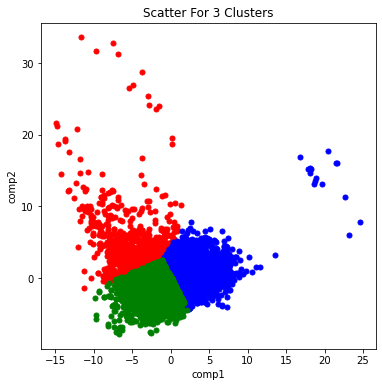

predicted  actual 
0          Bandari     112
           Gilaki      173
           Kordi       121
           Lori        229
           Torki       122
1          Bandari    1072
           Gilaki      414
           Kordi       775
           Lori        374
           Torki       783
2          Bandari     297
           Gilaki      792
           Kordi       640
           Lori        936
           Torki       433
Name: index, dtype: int64
------------------------------------------


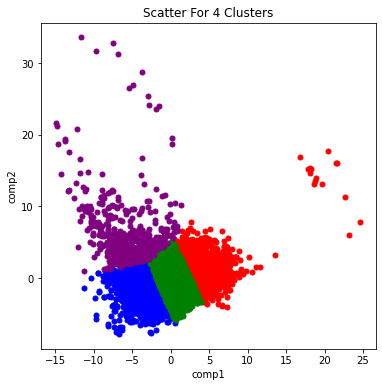

predicted  actual 
0          Bandari    689
           Gilaki     229
           Kordi      382
           Lori       184
           Torki      382
1          Bandari     84
           Gilaki     614
           Kordi      368
           Lori       714
           Torki      243
2          Bandari    621
           Gilaki     414
           Kordi      719
           Lori       488
           Torki      638
3          Bandari     87
           Gilaki     122
           Kordi       67
           Lori       153
           Torki       75
Name: index, dtype: int64
------------------------------------------


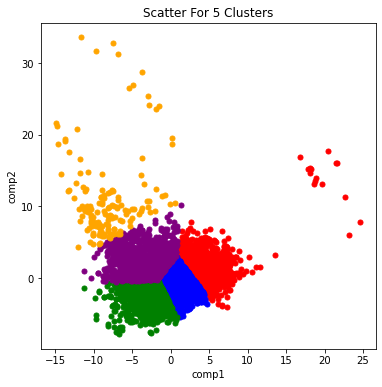

predicted  actual 
0          Bandari    633
           Gilaki     226
           Kordi      355
           Lori       181
           Torki      324
1          Bandari    611
           Gilaki     328
           Kordi      617
           Lori       342
           Torki      587
2          Bandari     63
           Gilaki     534
           Kordi      295
           Lori       605
           Torki      170
3          Bandari    135
           Gilaki     253
           Kordi      249
           Lori       363
           Torki      252
4          Bandari     39
           Gilaki      38
           Kordi       20
           Lori        48
           Torki        5
Name: index, dtype: int64
------------------------------------------


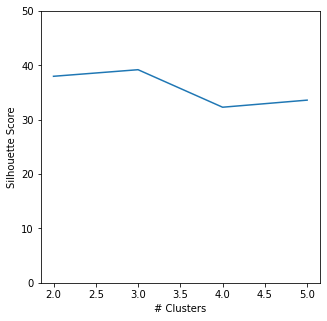

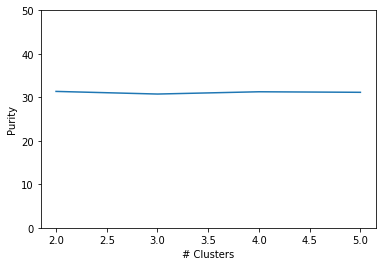

Purities:  [31.363, 30.758, 31.28, 31.156] 
Silhouette Scores:  [37.989, 39.201, 32.299, 33.603]


In [ ]:
def kmeans_cluster(data):
    n_clusters = [2, 3, 4, 5]
    sil_scores = []
    purity_scores = []
    for n in n_clusters: 
        kmeans = KMeans(n_clusters = n, random_state = 0).fit(reduced_df)
        predicted_labels = kmeans.labels_
        plot_clusters(data, predicted_labels, n)
        purity_scores.append(calc_purity(predicted_labels, y))
        sil_scores.append(round(100 * silhouette_score(data, predicted_labels), 3))
    
    plt.subplots(figsize = (5, 5))
    plt.plot(n_clusters, sil_scores)
    plt.xlabel("# Clusters")
    plt.ylabel("Silhouette Score")
    plt.ylim([0, 50])
    plt.show()
    plt.plot(n_clusters, purity_scores)
    plt.xlabel("# Clusters")
    plt.ylabel("Purity")
    plt.ylim([0, 50])
    plt.show()
    return purity_scores, sil_scores

purity_scores, sil_scores = kmeans_cluster(reduced_data)
print("Purities: ", purity_scores, "\nSilhouette Scores: ", sil_scores)

### K-Medoids

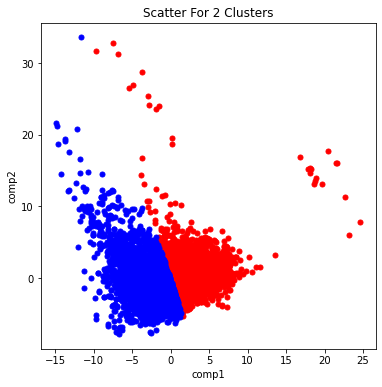

predicted  actual 
0          Bandari    1169
           Gilaki      460
           Kordi       844
           Lori        430
           Torki       851
1          Bandari     312
           Gilaki      919
           Kordi       692
           Lori       1109
           Torki       487
Name: index, dtype: int64
------------------------------------------


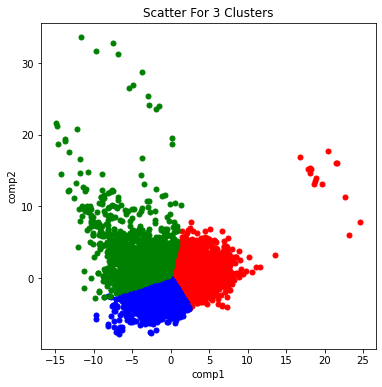

predicted  actual 
0          Bandari    1043
           Gilaki      402
           Kordi       715
           Lori        342
           Torki       736
1          Bandari     239
           Gilaki      623
           Kordi       478
           Lori        708
           Torki       301
2          Bandari     199
           Gilaki      354
           Kordi       343
           Lori        489
           Torki       301
Name: index, dtype: int64
------------------------------------------


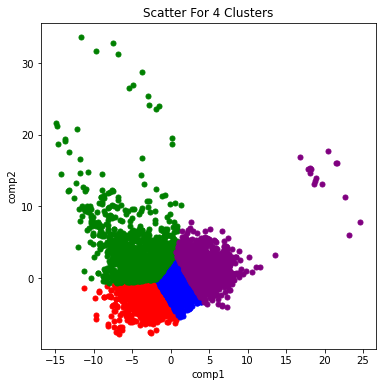

predicted  actual 
0          Bandari     65
           Gilaki     533
           Kordi      290
           Lori       596
           Torki      168
1          Bandari    529
           Gilaki     315
           Kordi      575
           Lori       332
           Torki      527
2          Bandari    171
           Gilaki     285
           Kordi      264
           Lori       405
           Torki      247
3          Bandari    716
           Gilaki     246
           Kordi      407
           Lori       206
           Torki      396
Name: index, dtype: int64
------------------------------------------


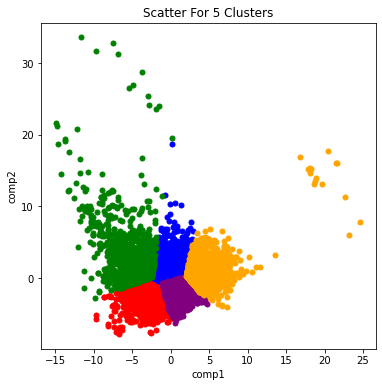

predicted  actual 
0          Bandari     57
           Gilaki     515
           Kordi      273
           Lori       567
           Torki      170
1          Bandari    265
           Gilaki     196
           Kordi      380
           Lori       287
           Torki      320
2          Bandari    110
           Gilaki     236
           Kordi      161
           Lori       311
           Torki      148
3          Bandari    416
           Gilaki     210
           Kordi      376
           Lori       216
           Torki      354
4          Bandari    633
           Gilaki     222
           Kordi      346
           Lori       158
           Torki      346
Name: index, dtype: int64
------------------------------------------


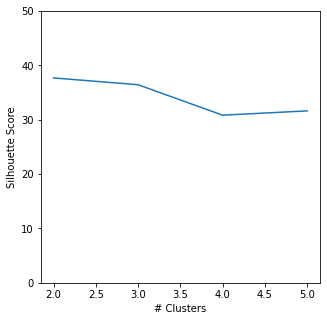

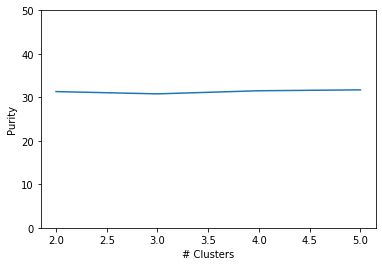

Purities:  [31.321, 30.799, 31.514, 31.72] 
Silhouette Scores:  [37.688, 36.436, 30.837, 31.626]


In [ ]:
def kmedoids_cluster(data):
    n_clusters = [2, 3, 4, 5]
    sil_scores = []
    purity_scores = []
    for n in n_clusters: 
        kmedoids = KMedoids(n_clusters = n, random_state = 0).fit(reduced_df)
        predicted_labels = kmedoids.labels_
        plot_clusters(data, predicted_labels, n)
        purity_scores.append(calc_purity(predicted_labels, y))
        sil_scores.append(round(100 * silhouette_score(data, predicted_labels), 3))
    
    plt.subplots(figsize = (5, 5))
    plt.plot(n_clusters, sil_scores)
    plt.xlabel("# Clusters")
    plt.ylabel("Silhouette Score")
    plt.ylim([0, 50])
    plt.show()
    plt.plot(n_clusters, purity_scores)
    plt.xlabel("# Clusters")
    plt.ylabel("Purity")
    plt.ylim([0, 50])
    plt.show()
    return purity_scores, sil_scores

purity_scores, sil_scores = kmedoids_cluster(reduced_data)
print("Purities: ", purity_scores, "\nSilhouette Scores: ", sil_scores)


### Hierarchical

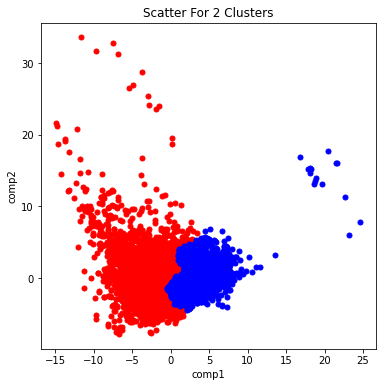

predicted  actual 
0          Bandari     400
           Gilaki      974
           Kordi       840
           Lori       1204
           Torki       623
1          Bandari    1081
           Gilaki      405
           Kordi       696
           Lori        335
           Torki       715
Name: index, dtype: int64
------------------------------------------


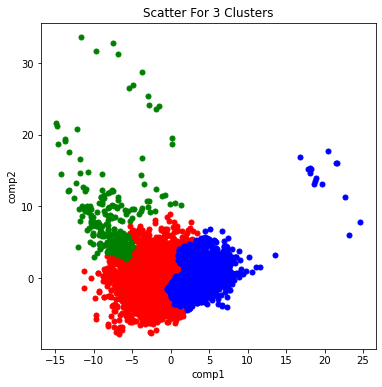

predicted  actual 
0          Bandari     353
           Gilaki      905
           Kordi       810
           Lori       1122
           Torki       600
1          Bandari    1081
           Gilaki      405
           Kordi       696
           Lori        335
           Torki       715
2          Bandari      47
           Gilaki       69
           Kordi        30
           Lori         82
           Torki        23
Name: index, dtype: int64
------------------------------------------


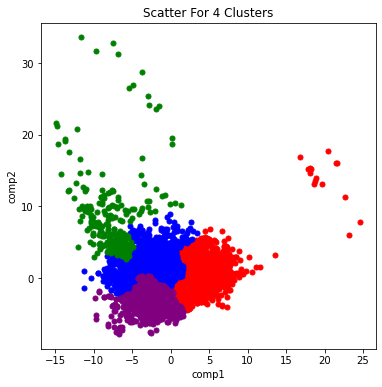

predicted  actual 
0          Bandari    1081
           Gilaki      405
           Kordi       696
           Lori        335
           Torki       715
1          Bandari     253
           Gilaki      365
           Kordi       466
           Lori        501
           Torki       409
2          Bandari      47
           Gilaki       69
           Kordi        30
           Lori         82
           Torki        23
3          Bandari     100
           Gilaki      540
           Kordi       344
           Lori        621
           Torki       191
Name: index, dtype: int64
------------------------------------------


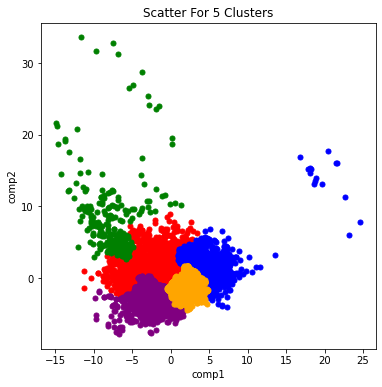

predicted  actual 
0          Bandari    253
           Gilaki     365
           Kordi      466
           Lori       501
           Torki      409
1          Bandari    508
           Gilaki     187
           Kordi      285
           Lori       154
           Torki      233
2          Bandari     47
           Gilaki      69
           Kordi       30
           Lori        82
           Torki       23
3          Bandari    100
           Gilaki     540
           Kordi      344
           Lori       621
           Torki      191
4          Bandari    573
           Gilaki     218
           Kordi      411
           Lori       181
           Torki      482
Name: index, dtype: int64
------------------------------------------


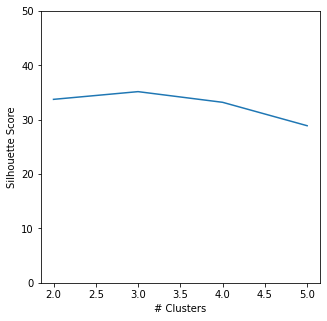

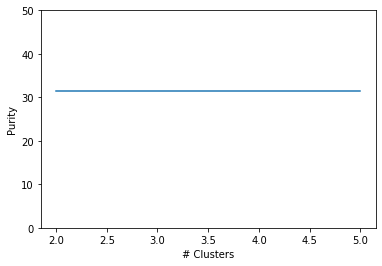

Purities:  [31.418, 31.418, 31.418, 31.418] 
Silhouette Scores:  [33.746, 35.166, 33.203, 28.896]


In [ ]:
def hierarchical_cluster(data):
    n_clusters = [2, 3, 4, 5]
    sil_scores = []
    purity_scores = []
    for n in n_clusters: 
        model = AgglomerativeClustering(n_clusters = n, affinity = 'euclidean', linkage = 'ward').fit(data)
        predicted_labels = model.labels_
        plot_clusters(data, predicted_labels, n)
        purity_scores.append(calc_purity(predicted_labels, y))
        sil_scores.append(round(100 * silhouette_score(data, predicted_labels), 3))
    
    plt.subplots(figsize = (5, 5))
    plt.plot(n_clusters, sil_scores)
    plt.xlabel("# Clusters")
    plt.ylabel("Silhouette Score")
    plt.ylim([0, 50])
    plt.show()
    plt.plot(n_clusters, purity_scores)
    plt.xlabel("# Clusters")
    plt.ylabel("Purity")
    plt.ylim([0, 50])
    plt.show()
    return purity_scores, sil_scores

purity_scores, sil_scores = hierarchical_cluster(reduced_data)
print("Purities: ", purity_scores, "\nSilhouette Scores: ", sil_scores)